In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prices = np.genfromtxt("prices.txt", delimiter="   ").T

In [3]:
n_inst, n_days = prices.shape

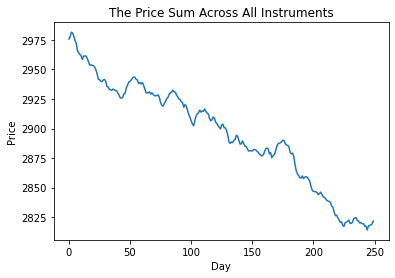

In [4]:
price_sum = prices.sum(axis=0)
plt.plot(price_sum)
plt.title("The Price Sum Across All Instruments")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [5]:
price_df = pd.DataFrame(prices)
price_df

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,40.44,40.58,40.52,40.47,40.23,40.22,40.28,40.18,40.30,40.28,...,43.64,43.75,43.70,43.80,43.69,43.80,43.87,43.66,43.61,43.52
1,4.90,4.88,4.90,4.92,4.91,4.95,4.95,4.92,4.92,4.91,...,4.12,4.13,4.13,4.14,4.13,4.13,4.13,4.14,4.14,4.12
2,30.92,30.95,31.02,30.98,30.93,30.89,30.86,30.78,30.71,30.68,...,28.59,28.61,28.59,28.55,28.56,28.54,28.56,28.59,28.64,28.68
3,18.51,18.41,18.37,18.42,18.39,18.42,18.31,18.37,18.41,18.36,...,17.77,17.75,17.93,18.00,18.01,17.95,17.96,18.05,18.06,18.06
4,47.69,47.55,47.70,47.66,48.09,47.97,48.07,47.95,48.05,48.16,...,47.62,47.84,47.70,47.97,47.57,47.41,47.11,47.13,46.72,47.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63.15,63.15,63.16,63.19,63.19,63.16,63.16,63.13,63.10,63.07,...,61.66,61.68,61.69,61.69,61.68,61.66,61.67,61.67,61.69,61.71
96,51.62,51.69,51.68,51.74,51.81,51.84,51.91,51.82,51.83,51.72,...,50.27,50.35,50.31,50.32,50.25,50.22,50.26,50.29,50.32,50.30
97,11.12,11.15,11.16,11.14,11.14,11.11,11.06,11.06,11.02,11.01,...,9.82,9.82,9.82,9.81,9.80,9.81,9.81,9.82,9.81,9.79
98,33.32,33.35,33.31,33.70,33.76,33.74,33.81,33.69,33.46,33.67,...,33.54,33.60,33.50,33.58,33.69,33.94,34.06,33.86,34.06,34.17


In [6]:
prices_ewm = price_df.ewm(span=5, axis=1).mean().to_numpy()
prices_ewm

array([[40.44      , 40.524     , 40.52210526, ..., 43.74404791,
        43.69936527, 43.63957685],
       [ 4.9       ,  4.888     ,  4.89368421, ...,  4.13474043,
         4.13649362,  4.13099575],
       [30.92      , 30.938     , 30.97684211, ..., 28.57272144,
        28.59514763, 28.62343175],
       ...,
       [11.12      , 11.138     , 11.14842105, ...,  9.81341373,
         9.81227582,  9.80485055],
       [33.32      , 33.338     , 33.32473684, ..., 33.83590291,
        33.91060194, 33.99706796],
       [41.1       , 41.25      , 41.52      , ..., 38.09595572,
        38.42063715, 38.56042476]])

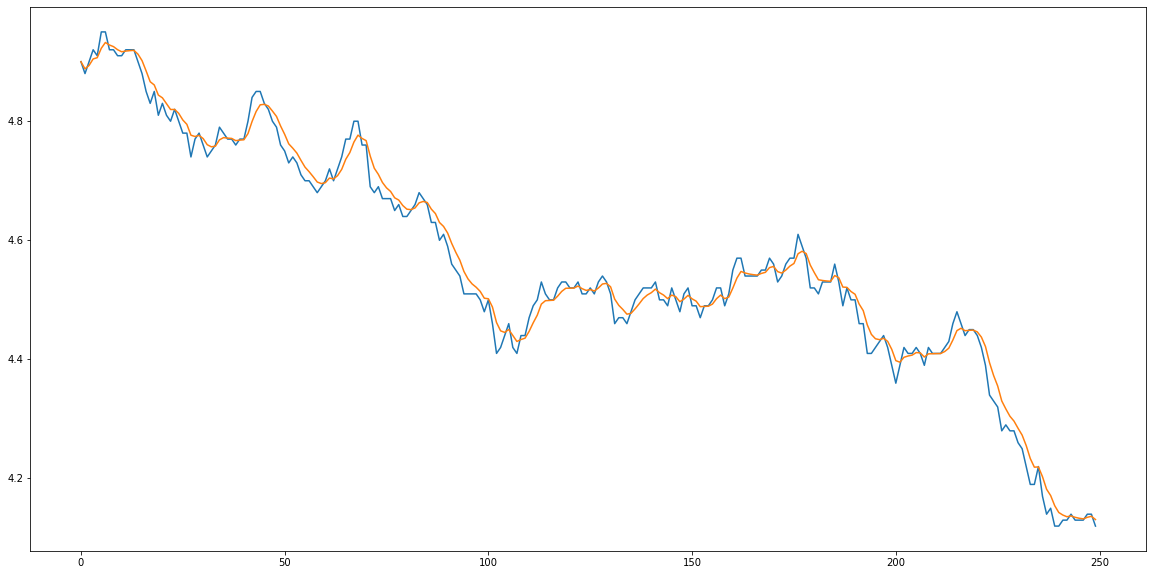

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
for i in (1,):
    ax = axes
#    ax = axes.ravel()[i]
    ax.plot(prices[i])
    ax.plot(prices_ewm[i])
#    ax.set_ylim(bottom=0)
plt.show()

fig.savefig("inst1_ewm.png")